## 引入numpy

In [219]:
import numpy as np

## 定义函数

In [220]:
def fit_function(x):
    return 2 * x**2 - 3 * x + 1

## 生成训练集和测试集

In [221]:
np.random.seed(0)
num_points = 100
X_train = np.random.uniform(-1, 1, num_points)
Y_train = fit_function(X_train) + np.random.normal(0, 0.1, num_points)

X_test = np.random.uniform(-1, 1, num_points)
Y_test = fit_function(X_test) + np.random.normal(0, 0.1, num_points)


## 定义ReLU函数

In [222]:
def relu(x):
    return np.maximum(0, x)


## 定义网络结构和初始化参数

In [223]:
input_size = 1
hidden_size = 100
output_size = 1

np.random.seed(0)
W1 = np.random.randn(hidden_size, input_size)
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size)
b2 = np.zeros((output_size, 1))

## 定义学习率和训练轮数

In [224]:
learning_rate = 0.00001
num_epochs = 1000
losses=[]


## 训练网络

In [225]:
for epoch in range(num_epochs):
    # 前向传播
    Z1 = np.dot(W1, X_train.reshape(1, -1)) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2

    # 计算损失
    loss = np.mean((A2 - Y_train.reshape(1, -1))**2)
    losses.append(loss)
    # 反向传播
    dA2 = 2 * (A2 - Y_train.reshape(1, -1))
    dZ2 = dA2
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = np.dot(dZ1, X_train.reshape(1, -1).T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    # 更新参数
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # 打印损失
    
    print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 34.54421614347553
Epoch 1, Loss: 29.529688699733974
Epoch 2, Loss: 25.296850568159712
Epoch 3, Loss: 21.719213051194465
Epoch 4, Loss: 18.695881968103212
Epoch 5, Loss: 16.13659024048154
Epoch 6, Loss: 13.966262991463063
Epoch 7, Loss: 12.123110659894301
Epoch 8, Loss: 10.556488246519372
Epoch 9, Loss: 9.223771451376932
Epoch 10, Loss: 8.088489659829216
Epoch 11, Loss: 7.120741770464531
Epoch 12, Loss: 6.294756894828823
Epoch 13, Loss: 5.589030223589141
Epoch 14, Loss: 4.985777679971897
Epoch 15, Loss: 4.468942595590669
Epoch 16, Loss: 4.025906064147392
Epoch 17, Loss: 3.6456940029463825
Epoch 18, Loss: 3.318983735411409
Epoch 19, Loss: 3.038468092935584
Epoch 20, Loss: 2.7971511215403013
Epoch 21, Loss: 2.5892894592501694
Epoch 22, Loss: 2.4099825284153353
Epoch 23, Loss: 2.255081716862523
Epoch 24, Loss: 2.121120995827094
Epoch 25, Loss: 2.00496493735858
Epoch 26, Loss: 1.9039818896597942
Epoch 27, Loss: 1.8159655832051635
Epoch 28, Loss: 1.739078346826465
Epoch 29, Lo

Epoch 244, Loss: 0.27918192142168846
Epoch 245, Loss: 0.27710061805412217
Epoch 246, Loss: 0.2750361138536202
Epoch 247, Loss: 0.27298826962351536
Epoch 248, Loss: 0.2709569476923578
Epoch 249, Loss: 0.26893842749121377
Epoch 250, Loss: 0.2669300834930718
Epoch 251, Loss: 0.26493797820412107
Epoch 252, Loss: 0.26296160702272126
Epoch 253, Loss: 0.2609952484156794
Epoch 254, Loss: 0.2590448751236459
Epoch 255, Loss: 0.25711035254479025
Epoch 256, Loss: 0.2551915477719547
Epoch 257, Loss: 0.25328954983532365
Epoch 258, Loss: 0.2514045126323174
Epoch 259, Loss: 0.2495347532420076
Epoch 260, Loss: 0.24768014469883123
Epoch 261, Loss: 0.24584058036842904
Epoch 262, Loss: 0.24401595403008922
Epoch 263, Loss: 0.24220082065590598
Epoch 264, Loss: 0.2403930000580432
Epoch 265, Loss: 0.23860351082449788
Epoch 266, Loss: 0.2368285468588148
Epoch 267, Loss: 0.2350674439465431
Epoch 268, Loss: 0.23331720955019267
Epoch 269, Loss: 0.23157086046024017
Epoch 270, Loss: 0.2298388452201132
Epoch 271, Lo

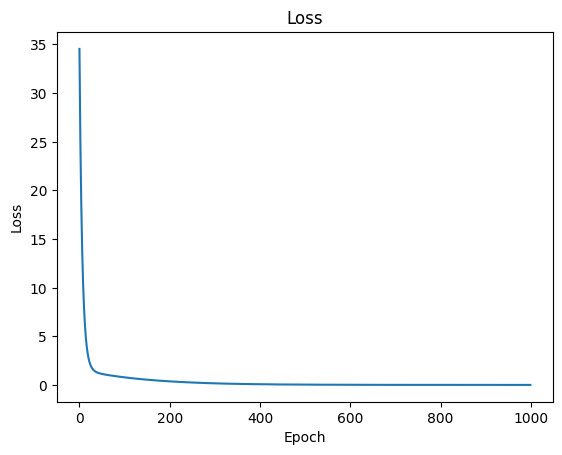

In [226]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


## 测试并计算损失

In [227]:


# 在测试集上测试
Z1 = np.dot(W1, X_test.reshape(1, -1)) + b1
A1 = relu(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = Z2

# 计算测试集上的损失
test_loss = np.mean((A2 - Y_test.reshape(1, -1))**2)
print(f"Test Loss: {test_loss}")

Test Loss: 0.030224253171291456


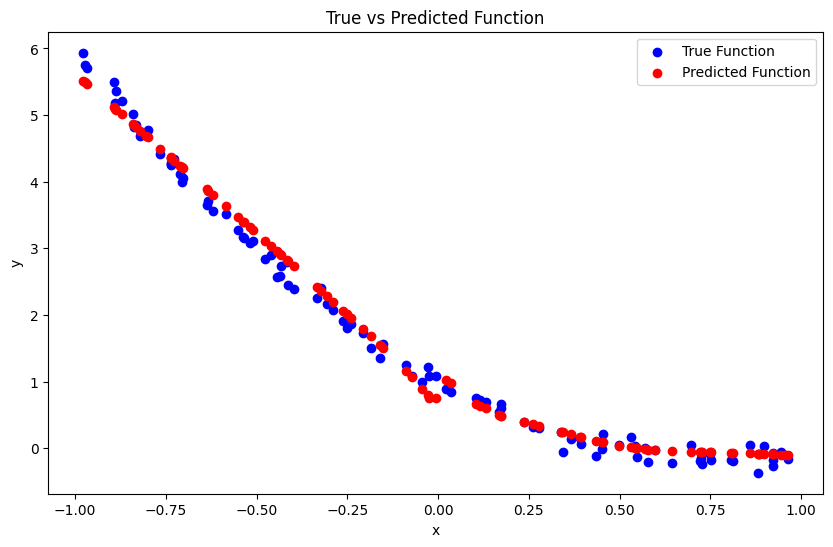

In [228]:
# 绘制源函数和拟合后的函数图像
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='blue', label='True Function')
plt.scatter(X_test, A2.flatten(), color='red', label='Predicted Function')
plt.title('True vs Predicted Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()